In [2]:
import pandas as pd
df = pd.read_csv('/Users/varunjoshi/Documents/Python/STIA_458/stiaFinalProject/test_set.csv')
df.head()

,Region,Title,Description
0,AFRICA,Politics of Africa: Fiction & Film,"In this course, we will take a look at the pol..."
1,EUROPE,The 21st Century History Wars,"On either side of the Atlantic, we are witness..."
2,ASIA,Asia's Nationalism,Nationalism has become a widely used concept i...
3,SLATAM,Latin Amern Govt and Politics,This course offers an introduction to the cont...
4,MENA,Intro to Study of Arab World Studies,This course provides a critical introduction t...


In [3]:
from io import StringIO
col = ['Region', 'Description']
df = df[col]
df = df[pd.notnull(df['Description'])]
df.columns = ['Region', 'Description']
df['category_id'] = df['Region'].factorize()[0]
category_id_df = df[['Region', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Region']].values)
df.head()

,Region,Description,category_id
0,AFRICA,"In this course, we will take a look at the pol...",0
1,EUROPE,"On either side of the Atlantic, we are witness...",1
2,ASIA,Nationalism has become a widely used concept i...,2
3,SLATAM,This course offers an introduction to the cont...,3
4,MENA,This course provides a critical introduction t...,4


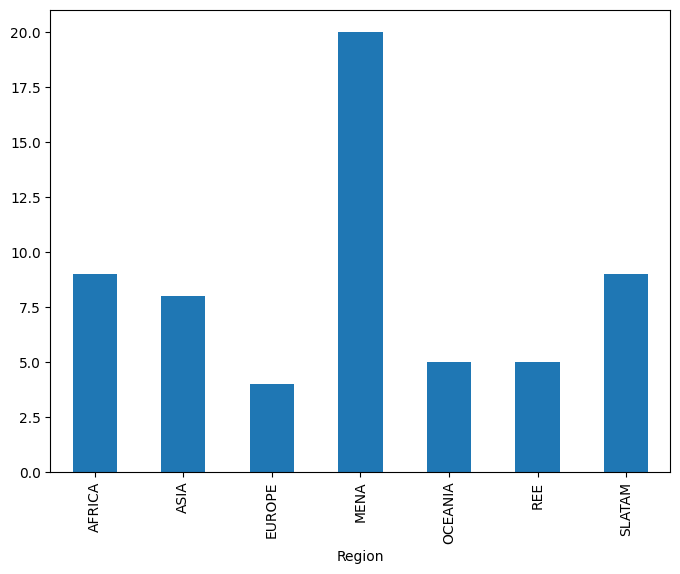

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Region').Description.count().plot.bar(ylim=0)
plt.show()

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.Description).toarray()
labels = df.category_id
features.shape

(60, 245)

In [7]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for Region, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names_out())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Region))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'AFRICA':
  . Most correlated unigrams:
. african
. africa
  . Most correlated bigrams:
. united states
. middle east
# 'ASIA':
  . Most correlated unigrams:
. home
. asia
  . Most correlated bigrams:
. course examine
. united states
# 'EUROPE':
  . Most correlated unigrams:
. european
. ii
  . Most correlated bigrams:
. world war
. war ii
# 'MENA':
  . Most correlated unigrams:
. middle
. arab
  . Most correlated bigrams:
. east north
. middle east
# 'OCEANIA':
  . Most correlated unigrams:
. powers
. interests
  . Most correlated bigrams:
. world war
. climate change
# 'REE':
  . Most correlated unigrams:
. climate
. russia
  . Most correlated bigrams:
. case studies
. climate change
# 'SLATAM':
  . Most correlated unigrams:
. america
. latin
  . Most correlated bigrams:
. latin america
. latin american


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df['Description'], df['Region'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [9]:
print(clf.predict(count_vect.transform(["In this course, we will take a look at the politics of Africa through the lens of fiction and film. Our discussions will focus on the transformative historical and political moments that have shaped the African continent over the course of the last two centuries. We will begin by reading Joseph Conrad’s Heart of Darkness, a fictional narrative written in the heydays of European colonialism, as a means to understand the profound and inescapable effects of colonization. We will also explore fictional accounts of Apartheid in South Africa, the Mau Mau Rebellion in Kenya, and the Biafran War in Nigeria, among others, in order to understand the close and inextricable links between literature and politics in Africa. The enormous impact of iconic political figures such as Nelson Mandela and Seretse Khama on fiction and film will also be considered."])))

['MENA']


In [10]:
print(clf.predict(count_vect.transform("This is a class on counter terrorism")))

ValueError: Iterable over raw text documents expected, string object received.

In [11]:
print(clf.predict(count_vect.transform(["In this course"])))

['MENA']


In [12]:
print(clf.predict(count_vect.transform(["Africa film studies"])))

['MENA']


In [13]:
print(clf.predict(count_vect.transform(["terrorism"])))

['MENA']


In [14]:
print(clf.predict(count_vect.transform(["economy"])))

['MENA']


In [15]:
print(clf.predict(count_vect.transform(["America"])))

['MENA']


In [16]:
print(clf.predict(count_vect.transform(["Putin"])))

['MENA']


In [17]:
print(clf.predict(count_vect.transform(["Latin American nations"])))

['SLATAM']


In [18]:
print(clf.predict(count_vect.transform(["Holocaust"])))

['MENA']


In [19]:
print(clf.predict(count_vect.transform(["Australia"])))

['MENA']


In [20]:
print(clf.predict(count_vect.transform(["New Zealand"])))

['MENA']


In [21]:
print(clf.predict(count_vect.transform(["China"])))

['MENA']


In [23]:
print(clf.predict(count_vect.transform(["Competition for strategic influence in Oceania is becoming"])))

['MENA']


In [24]:
print(clf.predict(count_vect.transform(["climate change in the united states"])))

['MENA']


In [25]:
print(clf.predict(count_vect.transform(["eastern europe"])))

['MENA']


In [26]:
print(clf.predict(count_vect.transform(["Christianity"])))

['MENA']


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 3
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

ModuleNotFoundError: No module named 'seaborn'

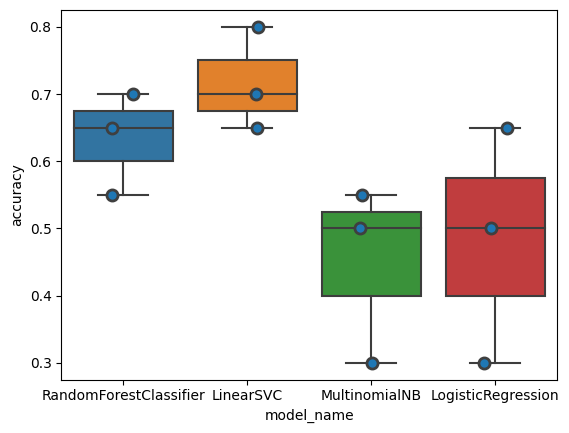

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 3
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [30]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.716667
LogisticRegression        0.483333
MultinomialNB             0.450000
RandomForestClassifier    0.633333
Name: accuracy, dtype: float64

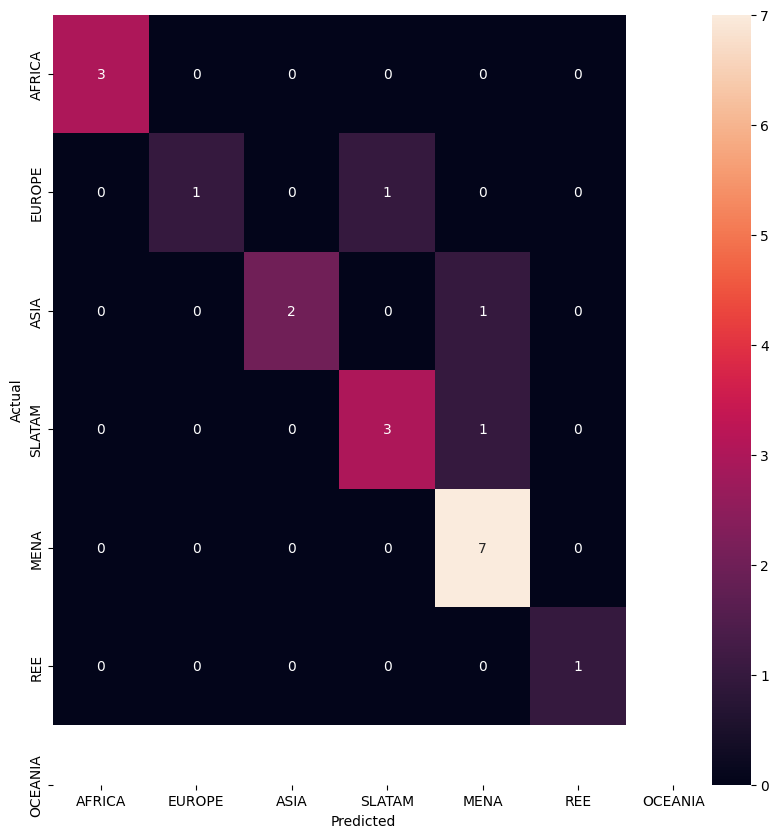

In [31]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Region.values, yticklabels=category_id_df.Region.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [35]:
# from IPython.display import display
# for predicted in category_id_df.category_id:
#   for actual in category_id_df.category_id:
#     if predicted != actual and conf_mat[actual, predicted] >= 5:
#       print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
#       display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Region', 'Description']])
#       print('')

IndexError: index 6 is out of bounds for axis 0 with size 6

In [36]:
model.fit(features, labels)
N = 2
for Region, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Region))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'AFRICA':
  . Top unigrams:
       . africa
       . african
  . Top bigrams:
       . case studies
       . course explore
# 'ASIA':
  . Top unigrams:
       . asia
       . nation
  . Top bigrams:
       . united states
       . course examine
# 'EUROPE':
  . Top unigrams:
       . ii
       . history
  . Top bigrams:
       . war ii
       . world war
# 'MENA':
  . Top unigrams:
       . arab
       . middle
  . Top bigrams:
       . middle east
       . east north
# 'OCEANIA':
  . Top unigrams:
       . interests
       . powers
  . Top bigrams:
       . world war
       . climate change
# 'REE':
  . Top unigrams:
       . russia
       . global
  . Top bigrams:
       . climate change
       . case studies
# 'SLATAM':
  . Top unigrams:
       . latin
       . america
  . Top bigrams:
       . latin american
       . latin america


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [48]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=['AFRICA', 'ASIA', 'MENA', 'REE', 'SLATAM', 'EUROPE']))

              precision    recall  f1-score   support

      AFRICA       1.00      1.00      1.00         3
        ASIA       1.00      0.50      0.67         2
        MENA       1.00      0.67      0.80         3
         REE       0.75      0.75      0.75         4
      SLATAM       0.78      1.00      0.88         7
      EUROPE       1.00      1.00      1.00         1

    accuracy                           0.85        20
   macro avg       0.92      0.82      0.85        20
weighted avg       0.87      0.85      0.84        20

